In [10]:
import numpy as np
import obspy
import shutil
from obspy import read
import matplotlib.pyplot as plt
import pandas as pd
import os

In [11]:
data_catalog_path = "space-apps/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA"
# assigning folder for filtered data 
dest_dir = "filtered_data"
visualized_data_dir = "visualized_data"

test_data = pd.read_csv('space-apps/space_apps_2024_seismic_detection/data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-03-30HR00_evid00020.csv')
st = read('space-apps/space_apps_2024_seismic_detection/data/lunar/test/data/S15_GradeA/xa.s15.00.mhz.1973-04-04HR00_evid00098.mseed')
# measurements = test_data['velocity(m/s)'].values
window_size = 15

In [12]:
moving_average = np.convolve(measurements, np.ones(window_size)/window_size, mode='valid')

xa.s12.00.mhz.1971-11-14HR00_evid00046.csv
xa.s12.00.mhz.1974-06-25HR00_evid00149.csv
xa.s12.00.mhz.1971-09-25HR00_evid00042.csv
xa.s12.00.mhz.1972-07-31HR00_evid00071.csv
xa.s12.00.mhz.1974-01-10HR00_evid00136.csv
xa.s12.00.mhz.1971-02-09HR00_evid00026.csv
xa.s12.00.mhz.1973-06-05HR00_evid00108.csv
xa.s12.00.mhz.1973-03-01HR00_evid00093.csv
xa.s12.00.mhz.1974-07-06HR00_evid00150.csv


KeyboardInterrupt: 

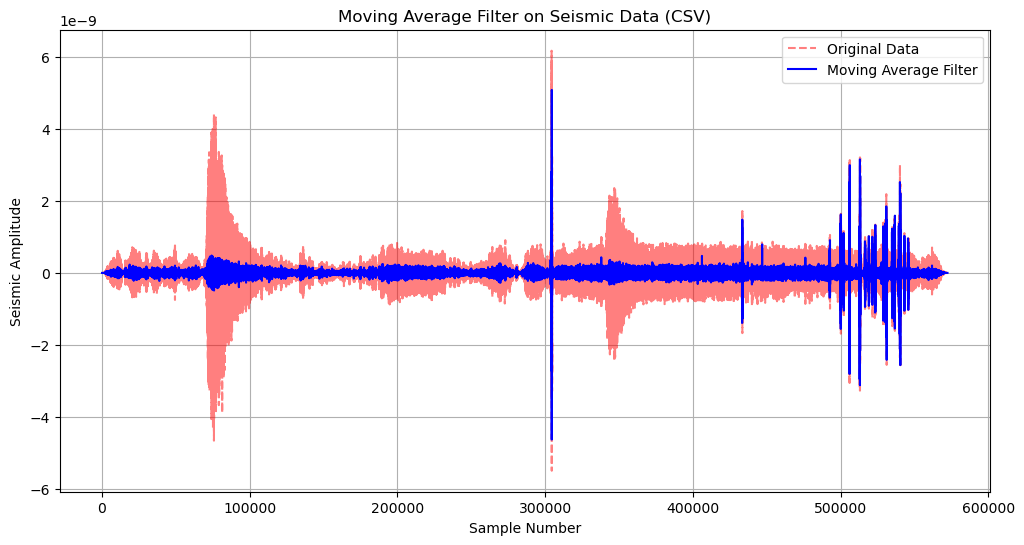

In [13]:
# Iterating through all files in the directory
for file_name in os.listdir(data_catalog_path):
    file_path = os.path.join(data_catalog_path, file_name)
    # Processing each file (for reading a CSV)
    if file_name.endswith('.csv'):
        data = pd.read_csv(file_path)
        measurements = data['velocity(m/s)'].values
        moving_average = np.convolve(measurements, np.ones(window_size)/window_size, mode='valid')
        print(f"{file_name}")
        # Plotting results
        plt.figure(figsize=(12, 6))
        plt.plot(measurements, label='Original Data', linestyle='--', color='red', alpha=0.5)
        plt.plot(moving_average, label='Moving Average Filter', color='blue')
        plt.title('Moving Average Filter on Seismic Data (CSV)')
        plt.xlabel('Sample Number')
        plt.ylabel('Seismic Amplitude')
        plt.legend()
        plt.grid()
        
        visualization_file_name = f"visualization_{file_name}.png"
        visualization_file_path = os.path.join(visualized_data_dir, visualization_file_name)  
        plt.savefig(visualization_file_path)  # Save to visualization directory
        plt.close()  # Close the plot to free up memory
        shutil.move(file_path, os.path.join(dest_dir, file_name))